<a href="https://colab.research.google.com/github/MacherelR/AutonomousRcCar/blob/main/LinesTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
# Mount google drive 4/1AY0e-g7Avb32AWPPmFcHrsjdLUd3EqoMWCg7dlwldmIeho1fPOAqcIXiRZI
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
model_output_dir = '/content/gdrive/My Drive/Colab Notebooks/LaneNavigation'

Mounted at /content/gdrive


In [ ]:
import sys
sys.path.insert(0,'/content/gdrive/MyDrive/Colab Notebooks')

IMPORTS

In [ ]:
# python standard libraries
import os
import random
import fnmatch
import datetime
import pickle

# data processing
import numpy as np
np.set_printoptions(formatter={'float_kind':lambda x: "%.4f" % x})

import pandas as pd
pd.set_option('display.width', 300)
pd.set_option('display.float_format', '{:,.4f}'.format)
pd.set_option('display.max_colwidth', 200)

# tensorflow
import tensorflow as tf
import keras
from keras.models import Sequential  # V2 is tensorflow.keras.xxxx, V1 is keras.xxx
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.models import load_model

print( f'tf.__version__: {tf.__version__}' )
print( f'keras.__version__: {keras.__version__}' )

# sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# imaging
import cv2
from imgaug import augmenters as img_aug
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from PIL import Image



import csv

import ML_Lib

tf.__version__: 2.5.0
keras.__version__: 2.5.0


In [ ]:
!cd /content

Load Github Repo


In [ ]:
!cd /content
if not os.path.isdir("AutonomousRcCar"):
  !git clone https://github.com/MacherelR/AutonomousRcCar
else:
  %cd AutonomousRcCar/
  #!git status
  #!git pull 
# #!ls

data_dir = '/content/AutonomousRcCar/Datas/images'
file_list = os.listdir(data_dir)
img_path = []
steeringList = []
pattern = "*.png"
for filename in file_list:
    if fnmatch.fnmatch(filename, pattern):
        img_path.append(os.path.join(data_dir,filename))
        angle = int(filename[-7:-4])  # 092 part of video01_143_092.png is the angle. 90 is go straight
        steeringList.append(angle)

idx = 131
test = True
plt.imshow(Image.open(img_path[idx]))
print("image_path: %s" % img_path[idx] )
print("steering_Angle: %d" % steeringList[idx] )
df = pd.DataFrame()
df['ImagePath'] = img_path
df['Angle'] = steeringList

/content/AutonomousRcCar2/AutonomousRcCar/AutonomousRcCar/AutonomousRcCar


FileNotFoundError: ignored

In [ ]:
def ImagePreprocess (image):
  height, _, _ = image.shape
  image = image[int(height/2):,15:-15,:]  # remove top half of the image, as it is not relevant for lane following
  image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)  # Nvidia model said it is best to use YUV color space
  image = cv2.GaussianBlur(image, (3,3), 0)
  image = cv2.resize(image, (200,66)) # input image size (200,66) Nvidia model
  image = image / 255 
  return image

Line Color Testing

Text(0.5, 1.0, 'Preprocessed with black lines (Non reflective')

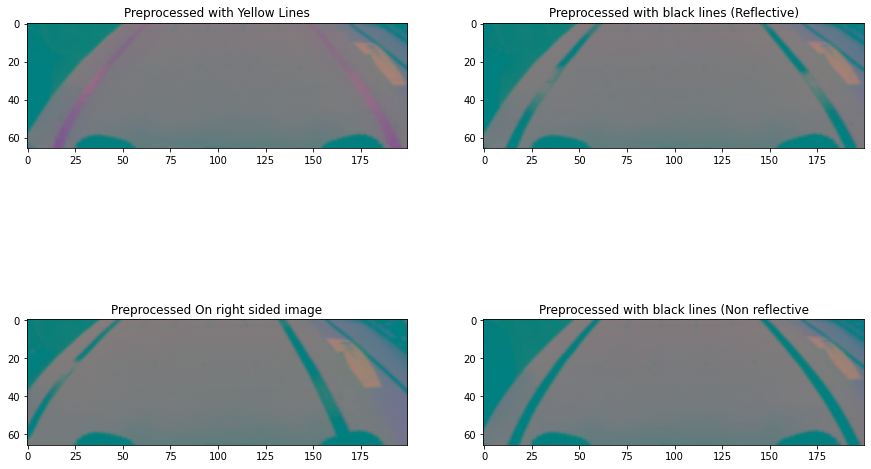

In [ ]:
imgPath1 = '/content/AutonomousRcCar/Datas/TestLignes/Image_LigneJaune.png'
imgPath2 = '/content/AutonomousRcCar/Datas/TestLignes/image_LigneNoire.png'
imgPath3 = '/content/AutonomousRcCar/Datas/TestLignes/image_RightSide.png'
imgPath4 = '/content/AutonomousRcCar/Datas/TestLignes/image_NoireNonR.png'

imgJaune = ML_Lib.imreadModif(imgPath1)
imgNoire = ML_Lib.imreadModif(imgPath2)
imgRightS = ML_Lib.imreadModif(imgPath3)
imgNoireNonR = ML_Lib.imreadModif(imgPath4)

prepJaune = ImagePreprocess(imgJaune)
prepNoire = ImagePreprocess(imgNoire)
prepRightSide = ImagePreprocess(imgRightS)
prepNoireNR = ImagePreprocess(imgNoireNonR)

fig, axes = plt.subplots(4, 2, figsize=(15, 10))
axes[0][0].imshow(imgJaune)
axes[0][0].set_title("Yellow lines original")
axes[0][1].imshow(prepJaune)
axes[0][1].set_title("Preprocessed with Yellow Lines")
axes[1][0].imshow(imgNoire)
axes[1][0].set_title("Black reflective lines original")
axes[1][1].imshow(prepNoire)
axes[1][1].set_title("Preprocessed with black lines (Reflective)")
axes[2][0].imshow(imgRightS)
axes[2][0].set_title("Right sided image original")
axes[2][1].imshow(prepRightSide)
axes[2][1].set_title("Preprocessed On right sided image")
axes[3][0].imshow(imgNoireNonR)
axes[3][0].set_title("Black non reflective lines original")
axes[3][1].imshow(prepNoireNR)
axes[3][1].set_title("Preprocessed with black lines (Non reflective")

In [ ]:
print(imgJaune.shape)

(240, 320, 3)
